# Proyecto segundo corte

**Grupo 4** 
- Héctor David Cardenas Bautista 
- William Andres Talero 
- Juan camilo Gutierrez
- Manuel Camilo Medina Gonzalez

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from vega_datasets import data

In [ ]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
df_diabetic = pd.read_csv('diabetic_data.csv', 
                 sep = ',',
                 index_col=0, #index_col=False
                 error_bad_lines=False,
                 dtype={
                     'patient_nbr': str,
                     'admission_type_id': str,
                     'discharge_disposition_id': str,
                     'admission_source_id': str,
                 })
df_diabetic.head()

patient_nbr             race  gender      age weight  \
encounter_id                                                        
2278392          8222157        Caucasian  Female   [0-10)      ?   
149190          55629189        Caucasian  Female  [10-20)      ?   
64410           86047875  AfricanAmerican  Female  [20-30)      ?   
500364          82442376        Caucasian    Male  [30-40)      ?   
16680           42519267        Caucasian    Male  [40-50)      ?   

             admission_type_id discharge_disposition_id admission_source_id  \
encounter_id                                                                  
2278392                      6                       25                   1   
149190                       1                        1                   7   
64410                        1                        1                   7   
500364                       1                        1                   7   
16680                        1                        1                   7   

              time_in_hospital payer_code         medical_specialty  \
encounter_id                                                          
2278392                      1          ?  Pediatrics-Endocrinology   
149190                       3          ?                         ?   
64410                        2          ?                         ?   
500364                       2          ?                         ?   
16680                        1          ?                         ?   

              num_lab_procedures  num_procedures  num_medications  \
encounter_id                                                        
2278392                       41               0                1   
149190                        59               0               18   
64410                         11               5               13   
500364                        44               1               16   
16680                         51               0                8   

              number_outpatient  number_emergency  number_inpatient  diag_1  \
encounter_id                                                                  
2278392                       0                 0                 0  250.83   
149190                        0                 0                 0     276   
64410                         2                 0                 1     648   
500364                        0                 0                 0       8   
16680                         0                 0                 0     197   

              diag_2 diag_3  number_diagnoses max_glu_serum A1Cresult  \
encounter_id                                                            
2278392            ?      ?                 1          None      None   
149190        250.01    255                 9          None      None   
64410            250    V27                 6          None      None   
500364        250.43    403                 7          None      None   
16680            157    250                 5          None      None   

             metformin repaglinide nateglinide chlorpropamide glimepiride  \
encounter_id                                                                
2278392             No          No          No             No          No   
149190              No          No          No             No          No   
64410               No          No          No             No          No   
500364              No          No          No             No          No   
16680               No          No          No             No          No   

             acetohexamide glipizide glyburide tolbutamide pioglitazone  \
encounter_id                                                              
2278392                 No        No        No          No           No   
149190                  No        No        No          No           No   
64410                   No    Steady        No          No           No   
500364      

**Dataset con las variables seleccionadas**

## pre-procesamiento de los datos

**Dimension del dataset**

In [ ]:
print('Base de datos pacientes con diabetes')
print('Filas: ', df_diabetic.shape[0])
print('Columnas: ', df_diabetic.shape[1])

Base de datos pacientes con diabetes
Filas:  101766
Columnas:  49


Atributos y tipos de atributo

In [ ]:
df_diabetic.dtypes

patient_nbr                 object
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

## Analisis de datos faltantes 

In [ ]:
df_NAs = df_diabetic == '?'
round((df_NAs.sum()/len(df_NAs))*100,4)

patient_nbr                  0.0000
race                         2.2336
gender                       0.0000
age                          0.0000
weight                      96.8585
admission_type_id            0.0000
discharge_disposition_id     0.0000
admission_source_id          0.0000
time_in_hospital             0.0000
payer_code                  39.5574
medical_specialty           49.0822
num_lab_procedures           0.0000
num_procedures               0.0000
num_medications              0.0000
number_outpatient            0.0000
number_emergency             0.0000
number_inpatient             0.0000
diag_1                       0.0206
diag_2                       0.3518
diag_3                       1.3983
number_diagnoses             0.0000
max_glu_serum                0.0000
A1Cresult                    0.0000
metformin                    0.0000
repaglinide                  0.0000
nateglinide                  0.0000
chlorpropamide               0.0000
glimepiride                 

## Seleccion de Variables

In [ ]:
df_diabetic_varsel = df_diabetic[['race','gender','age','admission_type_id','time_in_hospital','num_lab_procedures','num_medications','number_outpatient',
                                 'number_emergency','number_diagnoses','max_glu_serum','insulin','metformin','rosiglitazone','glimepiride','diabetesMed','readmitted']]
df_diabetic_varsel                          

race  gender      age admission_type_id  \
encounter_id                                                       
2278392             Caucasian  Female   [0-10)                 6   
149190              Caucasian  Female  [10-20)                 1   
64410         AfricanAmerican  Female  [20-30)                 1   
500364              Caucasian    Male  [30-40)                 1   
16680               Caucasian    Male  [40-50)                 1   
...                       ...     ...      ...               ...   
443847548     AfricanAmerican    Male  [70-80)                 1   
443847782     AfricanAmerican  Female  [80-90)                 1   
443854148           Caucasian    Male  [70-80)                 1   
443857166           Caucasian  Female  [80-90)                 2   
443867222           Caucasian    Male  [70-80)                 1   

              time_in_hospital  num_lab_procedures  num_medications  \
encounter_id                                                          
2278392                      1                  41                1   
149190                       3                  59               18   
64410                        2                  11               13   
500364                       2                  44               16   
16680                        1                  51                8   
...                        ...                 ...              ...   
443847548                    3                  51               16   
443847782                    5                  33               18   
443854148                    1                  53                9   
443857166                   10                  45               21   
443867222                    6                  13                3   

              number_outpatient  number_emergency  number_diagnoses  \
encounter_id                                                          
2278392                       0                 0                 1   
149190                        0                 0                 9   
64410                         2                 0                 6   
500364                        0                 0                 7   
16680                         0                 0                 5   
...                         ...               ...               ...   
443847548                     0                 0                 9   
443847782                     0                 0                 9   
443854148                     1                 0                13   
443857166                     0                 0                 9   
443867222                     0                 0                 9   

             max_glu_serum insulin metformin rosiglitazone glimepiride  \
encounter_id                                                             
2278392               None      No        No            No          No   
149190                None      Up        No            No          No   
64410                 None      No        No            No          No   
500364                None      Up        No            No          No   
16680                 None  Steady        No            No          No   
...                    ...     ...       ...           ...         ...   
443847548             None    Down    Steady            No          No   
443847782             None  Steady        No            No          No   
443854148             None    Down    Steady            No          No   
443857166             None      Up        No            No          No   
443867222             None      No        No            No          No   

             diabetesMed readmitted  
encounter_id                         
2278392               No         NO  
149190               Yes        >30  
64410                Yes         NO  
500364               Yes         NO  
16680                Yes         NO  
...                  ...        ...  
443847548            Yes 

Las variables seleccionadas Race,gender, age corresponden a caracteristicas fisicas que consideramos importantes de analizar para realizar la clasificación de los pacientes. \\

El tipo de admision, el tiempo en el hospital, el numero de diagnosticos y el numero y la calse de vistas previas a la hospitalizacion son variables relacionadas con el registro del hospital y el paciente, y son variables que pueden ayudar a clasificar a los pacientes en los modelos ya que atudan a distinguir los antecedentes del paciente y la gravedad del evento registrado.

las variables relacuonadas a medicamentos, insulina y gluseran son importantes para un paciente que tenga diabetes, las ultimas dos variables mencionadas son de medidas basicas para el control de esta enfermedad, por lo que su inclusion en este modelo es casi obligatoria. Por otra parte, los medicamentos incluidos son 3 de los medicamentos mas usuales para el tratamiento de la diabetes por lo que es interesante medir su influecia en la readmision al hopital.

Si tenia o no dibetes medicada previamente fue incluida bajo la hipotesis de que una persona que sabe de su condicion deberia de poder cuidarse más que una persona que recien descrubre su enfermedad, en base a esa hipotesis decidimos incluirla.  

**Eliminar datos faltantes**

In [ ]:
df_NAs = df_diabetic_varsel == '?'
round((df_NAs.sum()/len(df_NAs))*100,4)

race                  2.2336
gender                0.0000
age                   0.0000
admission_type_id     0.0000
time_in_hospital      0.0000
num_lab_procedures    0.0000
num_medications       0.0000
number_outpatient     0.0000
number_emergency      0.0000
number_diagnoses      0.0000
max_glu_serum         0.0000
insulin               0.0000
metformin             0.0000
rosiglitazone         0.0000
glimepiride           0.0000
diabetesMed           0.0000
readmitted            0.0000
dtype: float64

Antes de eliminar registros

In [ ]:
df_diabetic_varsel.shape

(101766, 17)

In [ ]:
df_diabetic0 = df_diabetic_varsel

df_diabetic1 = df_diabetic0[df_diabetic0['race'] != '?']

df_NAs = df_diabetic1 == '?'
round((df_NAs.sum()/len(df_NAs))*100,4)

race                  0.0
gender                0.0
age                   0.0
admission_type_id     0.0
time_in_hospital      0.0
num_lab_procedures    0.0
num_medications       0.0
number_outpatient     0.0
number_emergency      0.0
number_diagnoses      0.0
max_glu_serum         0.0
insulin               0.0
metformin             0.0
rosiglitazone         0.0
glimepiride           0.0
diabetesMed           0.0
readmitted            0.0
dtype: float64

Después de eliminar los datos

In [ ]:
df_diabetic1.shape

(99493, 17)

## Duplicados

In [ ]:
df_diabetic1[df_diabetic1.duplicated()]

race  gender      age admission_type_id  \
encounter_id                                                       
24887226            Caucasian  Female  [80-90)                 5   
25996404      AfricanAmerican  Female  [10-20)                 1   
40321320            Caucasian  Female  [70-80)                 1   
45872940      AfricanAmerican  Female  [30-40)                 3   
55362714            Caucasian    Male  [70-80)                 1   
...                       ...     ...      ...               ...   
434379164           Caucasian  Female  [70-80)                 1   
436212782           Caucasian  Female  [70-80)                 1   
441453920     AfricanAmerican  Female  [50-60)                 3   
441950918           Caucasian  Female  [70-80)                 1   
443102726           Caucasian  Female  [80-90)                 1   

              time_in_hospital  num_lab_procedures  num_medications  \
encounter_id                                                          
24887226                     4                  26               11   
25996404                     3                  51                3   
40321320                     5                  59               15   
45872940                     2                  22               15   
55362714                    11                  43               15   
...                        ...                 ...              ...   
434379164                    5                  72               22   
436212782                    2                  21               12   
441453920                    1                   1               10   
441950918                    2                  52               13   
443102726                    5                  66               24   

              number_outpatient  number_emergency  number_diagnoses  \
encounter_id                                                          
24887226                      0                 0                 8   
25996404                      0                 0                 1   
40321320                      0                 0                 8   
45872940                      0                 0                 6   
55362714                      0                 0                 9   
...                         ...               ...               ...   
434379164                     0                 0                 9   
436212782                     0                 0                 9   
441453920                     0                 0                 8   
441950918                     0                 0                 9   
443102726                     0                 0                 9   

             max_glu_serum insulin metformin rosiglitazone glimepiride  \
encounter_id                                                             
24887226              >200  Steady        No            No          No   
25996404              None  Steady        No            No          No   
40321320              None      No        No            No          No   
45872940              None      No        No            No          No   
55362714              None      No        No            No          No   
...                    ...     ...       ...           ...         ...   
434379164             None  Steady        No            No          No   
436212782             None  Steady        No            No          No   
441453920             None  Steady        No            No          No   
441950918             None  Steady        No            No          No   
443102726             None    Down        No            No          No   

             diabetesMed readmitted  
encounter_id                         
24887226             Yes         NO  
25996404             Yes         NO  
40321320              No         NO  
45872940              No         NO  
55362714              No         NO  
...                  ...        ...  
434379164            Yes 

In [ ]:
df_diabetic_trat = df_diabetic1.drop_duplicates()
df_dedupped = df_diabetic_trat.copy()

print(df_diabetic1.shape)
print(df_diabetic_trat.shape)

(99493, 17)
(99334, 17)


In [ ]:
df_diabetic_trat.head()

race  gender      age admission_type_id  \
encounter_id                                                       
2278392             Caucasian  Female   [0-10)                 6   
149190              Caucasian  Female  [10-20)                 1   
64410         AfricanAmerican  Female  [20-30)                 1   
500364              Caucasian    Male  [30-40)                 1   
16680               Caucasian    Male  [40-50)                 1   

              time_in_hospital  num_lab_procedures  num_medications  \
encounter_id                                                          
2278392                      1                  41                1   
149190                       3                  59               18   
64410                        2                  11               13   
500364                       2                  44               16   
16680                        1                  51                8   

              number_outpatient  number_emergency  number_diagnoses  \
encounter_id                                                          
2278392                       0                 0                 1   
149190                        0                 0                 9   
64410                         2                 0                 6   
500364                        0                 0                 7   
16680                         0                 0                 5   

             max_glu_serum insulin metformin rosiglitazone glimepiride  \
encounter_id                                                             
2278392               None      No        No            No          No   
149190                None      Up        No            No          No   
64410                 None      No        No            No          No   
500364                None      Up        No            No          No   
16680                 None  Steady        No            No          No   

             diabetesMed readmitted  
encounter_id                         
2278392               No         NO  
149190               Yes        >30  
64410                Yes         NO  
500364               Yes         NO  
16680                Yes         NO

## Consitencia de los datos

In [ ]:
df_diabetic_trat.dtypes

race                  object
gender                object
age                   object
admission_type_id     object
time_in_hospital       int64
num_lab_procedures     int64
num_medications        int64
number_outpatient      int64
number_emergency       int64
number_diagnoses       int64
max_glu_serum         object
insulin               object
metformin             object
rosiglitazone         object
glimepiride           object
diabetesMed           object
readmitted            object
dtype: object

### Revision individual de cada variable 

#### Race

In [ ]:
df_diabetic_trat['race'].value_counts()

Caucasian          75949
AfricanAmerican    19201
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

La variable race tiene 5 categorias, las cuales son concistentes con la variable. 

In [ ]:
df_diabetic_trat['race'] = df_diabetic_trat['race'].map({'Caucasian':0, 'AfricanAmerican':1,'Hispanic':2,'Asian':3,'Other':4})
df_diabetic_trat['race'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


encounter_id
2278392    0
149190     0
64410      1
500364     0
16680      0
Name: race, dtype: int64

#### Gender

In [ ]:
df_diabetic_trat['gender'].value_counts()

Female             53482
Male               45851
Unknown/Invalid        1
Name: gender, dtype: int64

La variable Gender tien 3 categorias que son consistentes con la variable, sin embargo la categoria ivalido o desconocido unicamente tien un dato, por lo que es posible que sea un error asi que decidimos eliminar ese registro.

In [ ]:
df_diabetic_trat = df_diabetic_trat[df_diabetic_trat['gender'] != 'Unknown/Invalid']
df_diabetic_trat['gender'].value_counts()

0.0    53482
1.0    45851
Name: gender, dtype: int64

In [ ]:
df_diabetic_trat['gender'] = df_diabetic_trat['gender'].map({'Female':0, 'Male':1})
df_diabetic_trat['gender'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


encounter_id
2278392    0.0
149190     0.0
64410      0.0
500364     1.0
16680      1.0
Name: gender, dtype: float64

#### Age

In [ ]:
df_diabetic_trat['age'].value_counts()

[70-80)     25417
[60-70)     21961
[50-60)     16875
[80-90)     16749
[40-50)      9461
[30-40)      3697
[90-100)     2723
[20-30)      1610
[10-20)       681
[0-10)        160
Name: age, dtype: int64

La variable Age, es el rango dee edad, por decadas, por lo que los datos y el type de los datos es consistente.

In [ ]:
df_diabetic_trat['age'] = df_diabetic_trat['age'].map({'[0-10)':0, '[10-20)':1, '[20-30)':2,'[30-40)':3,'[40-50)':4,'[50-60)':5,
                                                       '[60-70)':6,'[70-80)':7, '[80-90)':8,'[90-100)':9})
df_diabetic_trat['age'].head()

encounter_id
2278392    0
149190     1
64410      2
500364     3
16680      4
Name: age, dtype: int64

#### Admission_type_id

In [ ]:
df_diabetic_trat['admission_type_id'].value_counts()

1    52776
3    18491
2    17769
6     5225
5     4726
8      317
7       20
4       10
Name: admission_type_id, dtype: int64

La variable dmission_type_id es de númerica, aunque en el dataset aparece como categorias y aunque correponde realmente a categorias, la transformaremos a entero para facilitar su uso mas adelante.  

In [ ]:
df_diabetic_trat['admission_type_id']=df_diabetic_trat[['admission_type_id']].astype(int)
df_diabetic_trat['admission_type_id'].unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

#### time_in_hospital

In [ ]:
df_diabetic_trat['time_in_hospital'].describe()

count    99334.000000
mean         4.400487
std          2.987964
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64

La variable Time in hospital y el type de los datos es consistente.

#### num_lab_procedures     

In [ ]:
df_diabetic_trat['num_lab_procedures'].describe()

count    99334.000000
mean        43.073791
std         19.699058
min          1.000000
25%         31.000000
50%         44.000000
75%         57.000000
max        132.000000
Name: num_lab_procedures, dtype: float64

La variable num_lab_procedures y el type de los datos es consistente.

#### num_medications 

In [ ]:
df_diabetic_trat['num_medications'].describe()

count    99334.000000
mean        16.030835
std          8.123306
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64

La variable num_medications y el type de los datos es consistente.

number_outpatient

In [ ]:
df_diabetic_trat['number_outpatient'].describe()

count    99334.000000
mean         0.373940
std          1.277732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         42.000000
Name: number_outpatient, dtype: float64

La variable number_outpatient y el type de los datos es consistente.

number_emergency

In [ ]:
df_diabetic_trat['number_emergency'].describe()

count    99334.000000
mean         0.201653
std          0.940691
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         76.000000
Name: number_emergency, dtype: float64

La variable number_emergency y el type de los datos es consistente.

number_diagnoses       

In [ ]:
df_diabetic_trat['number_diagnoses'].describe()

count    99334.000000
mean         7.438068
std          1.926374
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         16.000000
Name: number_diagnoses, dtype: float64

La variable number_diagnoses y el type de los datos es consistente.

max_glu_serum 

In [ ]:
df_diabetic_trat['max_glu_serum'].value_counts()

None    94045
Norm     2571
>200     1465
>300     1253
Name: max_glu_serum, dtype: int64

La variable max_glu_serum y el type de los datos es consistente.

In [ ]:
df_diabetic_trat['max_glu_serum'] = df_diabetic_trat['max_glu_serum'].map({'None':0, 'Norm':1, '>200':2, '>300':3})
df_diabetic_trat['max_glu_serum'].head()

encounter_id
2278392    0
149190     0
64410      0
500364     0
16680      0
Name: max_glu_serum, dtype: int64

insulin

In [ ]:
df_diabetic_trat['insulin'].value_counts()

No        46422
Steady    29833
Down      12025
Up        11054
Name: insulin, dtype: int64

La variable insulin y el type de los datos es consistente.

In [ ]:
df_diabetic_trat['insulin'] = df_diabetic_trat['insulin'].map({'No':0, 'Steady':1, 'Down':2, 'Up':3})
df_diabetic_trat['insulin'].head()

encounter_id
2278392    0
149190     3
64410      0
500364     3
16680      1
Name: insulin, dtype: int64

metformin

In [ ]:
df_diabetic_trat['metformin'].value_counts()

No        79821
Steady    17912
Up         1039
Down        562
Name: metformin, dtype: int64

La variable metformin y el type de los datos es consistente.

In [ ]:
df_diabetic_trat['metformin'] = df_diabetic_trat['metformin'].map({'No':0, 'Steady':1, 'Down':2, 'Up':3})
df_diabetic_trat['metformin'].head()

encounter_id
2278392    0
149190     0
64410      0
500364     0
16680      0
Name: metformin, dtype: int64

rosiglitazone

In [ ]:
df_diabetic_trat['rosiglitazone'].value_counts()

No        93107
Steady     5968
Up          175
Down         84
Name: rosiglitazone, dtype: int64

La variable rosiglitazone y el type de los datos es consistente.

In [ ]:
df_diabetic_trat['rosiglitazone'] = df_diabetic_trat['rosiglitazone'].map({'No':0, 'Steady':1, 'Down':2, 'Up':3})
df_diabetic_trat['rosiglitazone'].head()

encounter_id
2278392    0
149190     0
64410      0
500364     0
16680      0
Name: rosiglitazone, dtype: int64

glimepiride

In [ ]:
df_diabetic_trat['glimepiride'].value_counts()

No        94302
Steady     4525
Up          321
Down        186
Name: glimepiride, dtype: int64

La variable glimepiride y el type de los datos es consistente.

In [ ]:
df_diabetic_trat['glimepiride'] = df_diabetic_trat['glimepiride'].map({'No':0, 'Steady':1, 'Down':2, 'Up':3})
df_diabetic_trat['glimepiride'].head()

encounter_id
2278392    0
149190     0
64410      0
500364     0
16680      0
Name: glimepiride, dtype: int64

diabetesMed

In [ ]:
df_diabetic_trat['diabetesMed'].value_counts()

Yes    76390
No     22944
Name: diabetesMed, dtype: int64

La variable diabetesMed y el type de los datos es consistente.

In [ ]:
df_diabetic_trat['diabetesMed'] = df_diabetic_trat['diabetesMed'].map({'No':0, 'Yes':1})
df_diabetic_trat['diabetesMed'].head()

encounter_id
2278392    0
149190     1
64410      1
500364     1
16680      1
Name: diabetesMed, dtype: int64

readmitted

In [ ]:
df_diabetic_trat['readmitted'].value_counts()

NO     53200
>30    34968
<30    11166
Name: readmitted, dtype: int64

La variable readmitted y el type de los datos es consistente.

In [ ]:
round(df_diabetic_trat['readmitted'].value_counts()/len(df_diabetic['readmitted'])*100,4)

NO     52.2768
>30    34.3612
<30    10.9722
Name: readmitted, dtype: float64

En cuanto a las proporciones el 52.27% de los datos pertenecen a la categorias 'No', el 34.361% a la categoria maoyor de 30 días y el restante 10.97% pertenece a la categoria menor a 30 días.

In [ ]:
df_diabetic_trat['readmitted'] = df_diabetic_trat['readmitted'].map({'NO':0, '>30':1,'<30':2})
df_diabetic_trat['readmitted'].head()

encounter_id
2278392    0
149190     1
64410      0
500364     0
16680      0
Name: readmitted, dtype: int64

In [ ]:
df_diabetic_trat.dtypes

race                    int64
gender                float64
age                     int64
admission_type_id       int64
time_in_hospital        int64
num_lab_procedures      int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_diagnoses        int64
max_glu_serum           int64
insulin                 int64
metformin               int64
rosiglitazone           int64
glimepiride             int64
diabetesMed             int64
readmitted              int64
dtype: object

## Arbol de decisión 

In [ ]:
X = df_diabetic_trat.drop(['readmitted'],axis=1)
y = df_diabetic_trat.readmitted


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size = 0.9, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(89399, 16) (9934, 16) (89399,) (9934,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz 
from sklearn.model_selection import cross_val_score


### Número optimo de ramas

In [ ]:
max_depth_range = range(1, 10)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treeclf = DecisionTreeClassifier(max_depth=depth, random_state=14)
    MSE_scores = cross_val_score(treeclf, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

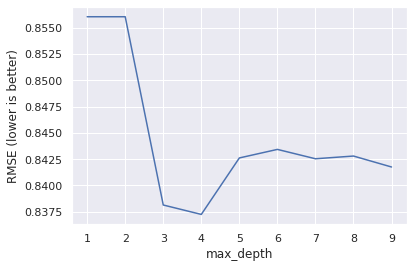

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

En base a el valor del $RMSE$ el número obtimo de ramas en de 4

### Creacíon de Arbol

In [106]:
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

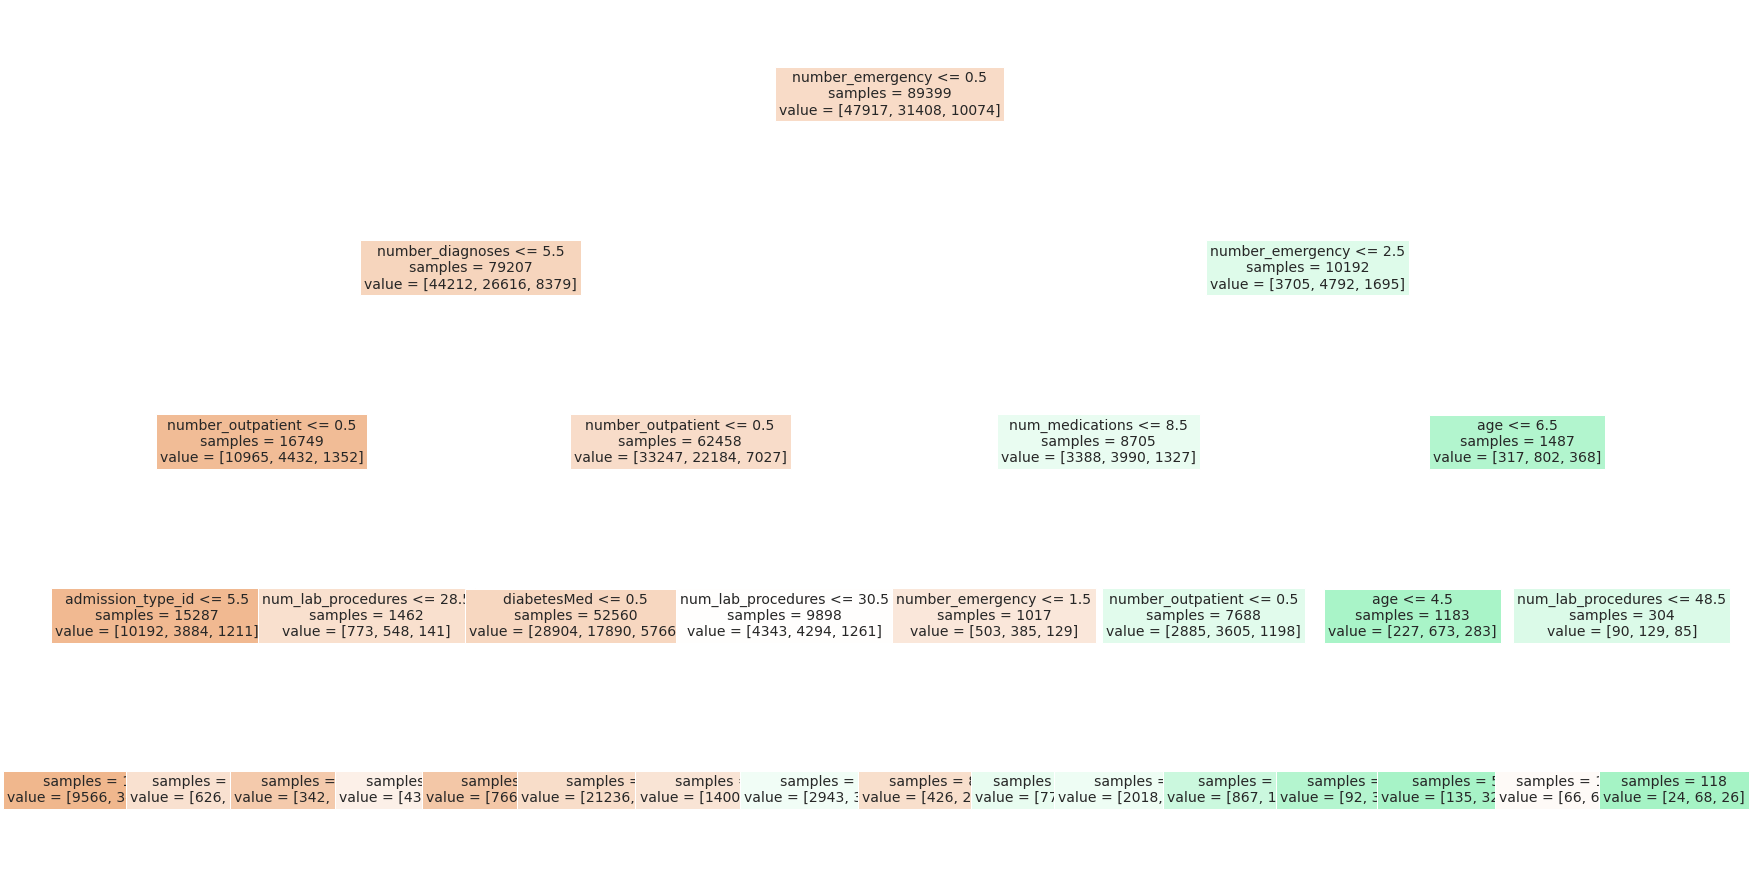

In [107]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(30, 16))

plot = plot_tree(
            decision_tree = treeclf,
            feature_names = X.columns,
            filled        = True,
            impurity      = False,
            fontsize      = 14,
            precision     = 2,
            ax            = ax
       )

La división derecha es cuando la condicion es falsa, Lsn derecha y color verde son de la categoria readmitido en más de 30 días, los de color naranja no readmitidos y blanco es de readmitido en menos de 30 días   

### Importancia de las variables

In [108]:
pd.DataFrame({'feature':X.columns, 'importance':treeclf.feature_importances_})

feature  importance
0                 race    0.000000
1               gender    0.000000
2                  age    0.010456
3    admission_type_id    0.032538
4     time_in_hospital    0.000000
5   num_lab_procedures    0.035181
6      num_medications    0.015094
7    number_outpatient    0.171430
8     number_emergency    0.435536
9     number_diagnoses    0.230931
10       max_glu_serum    0.000000
11             insulin    0.000000
12           metformin    0.000000
13       rosiglitazone    0.000000
14         glimepiride    0.000000
15         diabetesMed    0.068834

Multiples variables seleccionadas no so nrelevantes para la clasificacion del modelo, Ninguno de los medicamentos, la insulina, la glucosa, el tiempo en el hospital, el genero y la raza no resultaron relevantes para la construccon del modelo.

Por otra parte la variable mas predictiva el numero de emergencias antes de ser hospitalizado, seguido de el número de diagnosticos y el numero de visitas ambulatorias respectivamente. 

### Predicción 

In [109]:
y_pred = treeclf.predict(X_test)
y_pred
ceros = np.count_nonzero(y_pred == 0)
unos = np.count_nonzero(y_pred == 1)
dos = np.count_nonzero(y_pred == 2)

pred = pd.DataFrame({'Feature':['No readmitido','>30','<30'], 'pred':[ceros,unos,dos]})
pred

Feature  pred
0  No readmitido  8146
1            >30  1788
2            <30     0

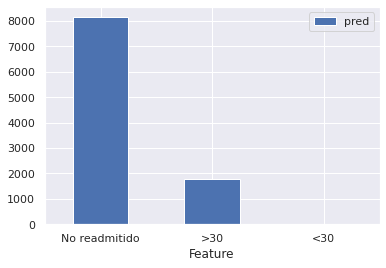

In [110]:
pred.plot.bar(x='Feature',y='pred', rot = 0)

$RMSE$

In [111]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.8332964222413979

Validación cruzada

$MSE$

In [112]:
from sklearn import metrics
print('MSE Arbol de desición:', metrics.mean_squared_error(y_test, y_pred))

MSE Arbol de desición: 0.694382927320314


## Modelo de regresion logistica

In [ ]:
df_dedupped["readmitted"].value_counts()

0    53200
1    46134
Name: readmitted, dtype: int64

In [ ]:
df_dedupped.head()

race  gender  age admission_type_id  time_in_hospital  \
encounter_id                                                          
2278392          3       1    1                 6                 1   
149190           3       1    2                 1                 3   
64410            1       1    3                 1                 2   
500364           3       2    4                 1                 2   
16680            3       2    5                 1                 1   

              num_lab_procedures  num_medications  number_outpatient  \
encounter_id                                                           
2278392                       41                1                  0   
149190                        59               18                  0   
64410                         11               13                  2   
500364                        44               16                  0   
16680                         51                8                  0   

              number_emergency  number_diagnoses  max_glu_serum  insulin  \
encounter_id                                                               
2278392                      0                 1              0        0   
149190                       0                 9              0        3   
64410                        0                 6              0        0   
500364                       0                 7              0        3   
16680                        0                 5              0        2   

              metformin  rosiglitazone  glimepiride  diabetesMed  readmitted  
encounter_id                                                                  
2278392             0.0              0          0.0            0           0  
149190              0.0              0          0.0            1           1  
64410               0.0              0          0.0            1           0  
500364              0.0              0          0.0            1           0  
16680               0.0              0          0.0            1           0

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)

In [ ]:
X = df_dedupped[["race","gender","age","max_glu_serum","insulin","rosiglitazone","diabetesMed",'admission_type_id','time_in_hospital','num_lab_procedures','num_medications','number_outpatient',
                                 'number_emergency','number_diagnoses']]
y = df_dedupped["readmitted"]
logreg.fit(X,y)
logreg.coef_

array([[-0.01334273, -0.05739212,  0.01996973,  0.05932999, -0.01584471,
         0.02224959,  0.29434138,  0.0082632 ,  0.01777986,  0.00225634,
        -0.00258018,  0.10872917,  0.36595142,  0.09397044]])

In [ ]:
########## IMPLEMENTACIÓN DE REGRESIÓN LOGÍSTICA ##########
from sklearn.model_selection import train_test_split

In [ ]:
X = df_dedupped[["race","gender","age","max_glu_serum","insulin","rosiglitazone","diabetesMed",'admission_type_id','time_in_hospital','num_lab_procedures','num_medications','number_outpatient',
                                 'number_emergency','number_diagnoses']]
y = df_dedupped["readmitted"]

In [ ]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Se escalan todos los datos
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Defino el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entreno el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[8107 2440]
 [6192 3128]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Precisión del modelo:
0.5617816091954023
Exactitud del modelo:
0.5655106457945337
Sensibilidad del modelo:
0.3356223175965665


In [ ]:
# Calcular el mse para cada uno de los modelos
from sklearn import metrics
import numpy as np
print('MSE regresión logistica:', metrics.mean_squared_error(y_test, y_pred))

MSE regresión logistica: 0.43448935420546636


In [ ]:
#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
0.5588307582852978


In [ ]:
# curva de roc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

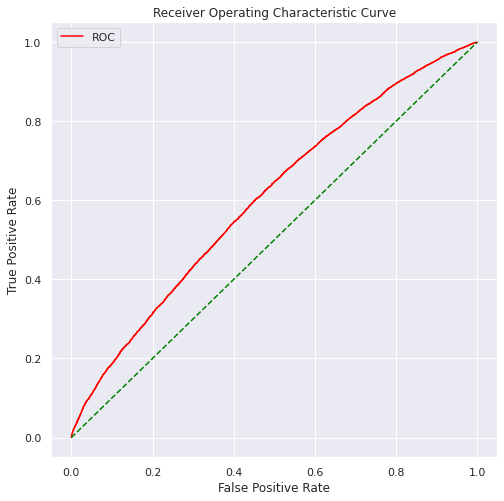

In [ ]:
prob = algoritmo.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds=roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

**Validacion Cruzada**

In [ ]:
# Crear el metodo K fold CV
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=666, shuffle=True)

In [ ]:
algoritmo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(algoritmo, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [ ]:
# Calcular el mse para el modelo 
print('MSE regresión SGD:', abs(np.mean(scores)))

MSE regresión SGD: 0.42684273134125883
